### Importing the necessary libraries

In [18]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

### Reading all the datasets

In [ ]:
oil_df = pd.read_csv("/Users/nandinibhattad/Desktop/Task 1/oil.csv", parse_dates=['date'])

sample_submission_df = pd.read_csv("/Users/nandinibhattad/Desktop/Task 1/sample_submission.csv")

holidays_events_df = pd.read_csv("/Users/nandinibhattad/Desktop/Task 1/holidays_events.csv", parse_dates=['date'])

stores_df = pd.read_csv("/Users/nandinibhattad/Desktop/Task 1/stores.csv")

train_df = pd.read_csv("/Users/nandinibhattad/Desktop/Task 1/train.csv", parse_dates=['date'])

test_df = pd.read_csv("/Users/nandinibhattad/Desktop/Task 1/test.csv", parse_dates=['date'])

transactions_df = pd.read_csv("/Users/nandinibhattad/Desktop/Task 1/transactions.csv", parse_dates=['date'])

In [ ]:
#Impute or replace the missing values in the 'dcoilwtico' column of the DataFrame 'oil_df' by using the values that come after the missing ones, 
# effectively filling the gaps in a backward direction.
oil_df.dcoilwtico.fillna(method='backfill', inplace=True)

In [ ]:
#Combine data from multiple DataFrames ('train_df', 'oil_df', 'stores_df', 'transactions_df', and 'holidays_events_df') to create the 
# 'train_master' DataFrame. It includes information on sales, oil prices, store details, transactions, and holiday events, handling missing values 
# and duplicates during the merging process.
train_master = pd.merge(train_df, oil_df, on='date', how='left').fillna(method='ffill')
train_master = pd.merge(train_master, stores_df, on='store_nbr', how='left')
train_master = pd.merge(train_master, transactions_df, on=['date', 'store_nbr'], how='left').fillna('0')
train_master = pd.merge(train_master,
                         holidays_events_df[['date', 'type', 'locale', 'transferred']],
                         on='date', how='left', suffixes=('_store', '_holiday'))\
                         .drop_duplicates(subset=['id']).reset_index(drop=True)


In [ ]:
test_master = pd.merge(test_df, oil_df, on='date', how='left').fillna(method='ffill')
test_master = pd.merge(test_master, stores_df, on='store_nbr', how='left')
test_master = pd.merge(test_master, transactions_df, on=['date', 'store_nbr'], how='left').fillna('0')
test_master = pd.merge(test_master,
                       holidays_events_df[['date', 'type', 'locale', 'transferred']],
                       on='date', how='left', suffixes=('_store', '_holiday'))\
                       .drop_duplicates(subset=['id']).reset_index(drop=True)

In [ ]:
#For rows in the 'train_master' DataFrame where the 'type_holiday' column is missing, set the value to 'Not Any'. 
# Similarly, for rows where the 'locale' column is missing, set the value to 'Not Any', and for rows where the 'transferred' column is missing, set the value to False.
train_master.loc[train_master['type_holiday'].isna(), 'type_holiday'] = 'Not Any'
train_master.loc[train_master['locale'].isna(), 'locale'] = 'Not Any'
train_master.loc[train_master['transferred'].isna(), 'transferred'] = False


In [ ]:
test_master.loc[test_master['type_holiday'].isna(), 'type_holiday'] = 'Not Any'
test_master.loc[test_master['locale'].isna(), 'locale'] = 'Not Any'
test_master.loc[test_master['transferred'].isna(), 'transferred'] = False

In [ ]:
#Calculate and print the total count of missing values across all columns in the 'train_master' DataFrame 
# and the 'test_master' DataFrame. This helps to understand the overall amount of missing data in each DataFrame.
print('train_master: ',train_master.isna().sum().sum())
print('test_master: ',test_master.isna().sum().sum())

train_master:  0
test_master:  0


In [ ]:
display(train_master.head(4))
display(test_master.head(4))

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_store,cluster,transactions,type_holiday,locale,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,0,Holiday,National,False
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,0,Holiday,National,False
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,0,Holiday,National,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,0,Holiday,National,False


,id,date,store_nbr,family,onpromotion,dcoilwtico,city,state,type_store,cluster,transactions,type_holiday,locale,transferred
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,Quito,Pichincha,D,13,0,Not Any,Not Any,False
1,3000889,2017-08-16,1,BABY CARE,0,46.8,Quito,Pichincha,D,13,0,Not Any,Not Any,False
2,3000890,2017-08-16,1,BEAUTY,2,46.8,Quito,Pichincha,D,13,0,Not Any,Not Any,False
3,3000891,2017-08-16,1,BEVERAGES,20,46.8,Quito,Pichincha,D,13,0,Not Any,Not Any,False


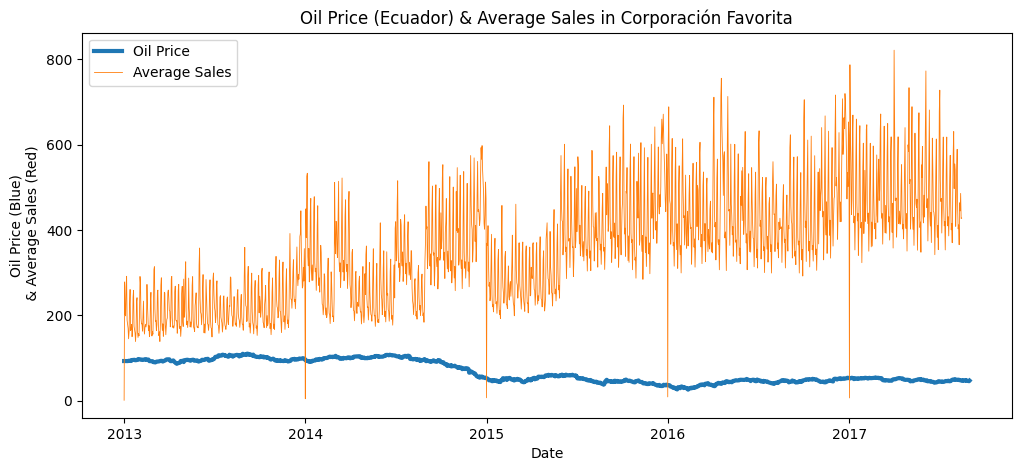

In [ ]:
# change size of chart
plt.figure(figsize=(12, 5))

# draw lines
sns.lineplot(x=oil_df.date, y=oil_df.dcoilwtico, lw=3, label='Oil Price')
sns.lineplot(data=train_df.groupby('date')['sales'].mean().reset_index(), x='date', y='sales',
             lw=0.6, label='Average Sales')

# sdd labels and title
plt.xlabel("Date")
plt.ylabel("Oil Price (Blue)\n & Average Sales (Red)")
plt.title("Oil Price (Ecuador) & Average Sales in Corporación Favorita")

# show the plot
plt.show()

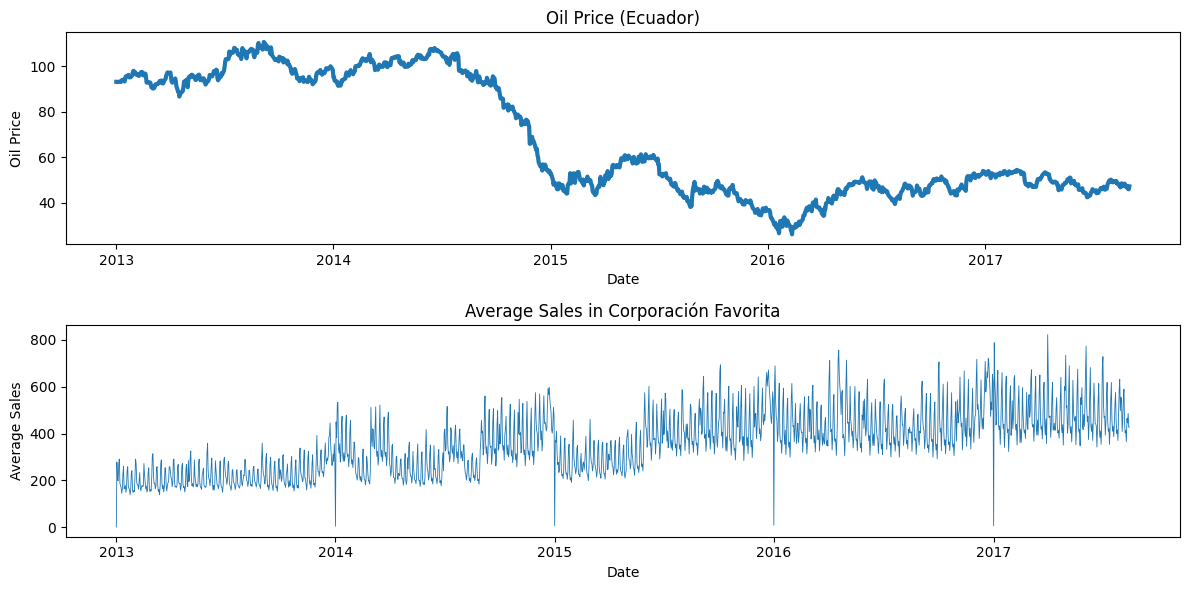

In [ ]:
# Create a grid of subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Draw the first line plot for Oil Price on the first subplot
sns.lineplot(x=oil_df.date, y=oil_df.dcoilwtico, lw=3, ax=axes[0])

# Add labels and title for the first subplot
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Oil Price")
axes[0].set_title("Oil Price (Ecuador)")

# Draw the second line plot for Average Sales on the second subplot
sns.lineplot(data=train_df.groupby('date')['sales'].mean().reset_index(), x='date', y='sales', lw=0.6, ax=axes[1])

# Add labels and title for the second subplot
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Average Sales")
axes[1].set_title("Average Sales in Corporación Favorita")

# Adjust the layout to avoid overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()

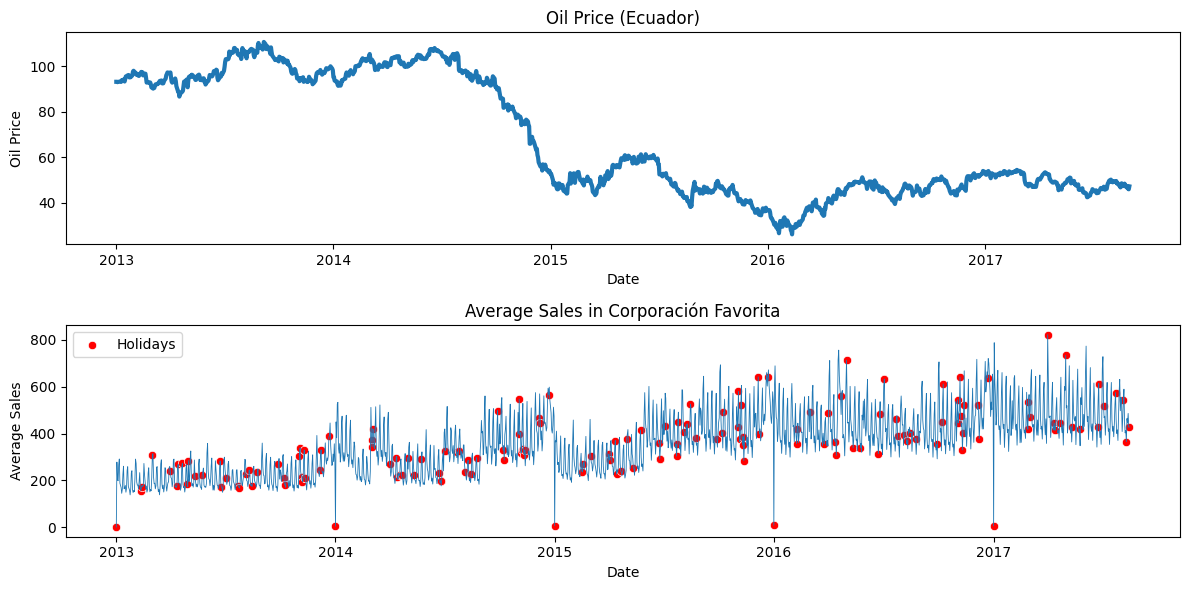

In [ ]:
merged_df = pd.merge(left=train_df.groupby('date')['sales'].mean().reset_index(),
                     right=holidays_events_df.loc[lambda df: (df['date']>='2013-01-01') & \
                           (df['type']=='Holiday')][['date','type']],
                     how='left',
                     on='date').fillna('False')

# Create a grid of subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Draw the first line plot for Oil Price on the first subplot
sns.lineplot(x=oil_df.date, y=oil_df.dcoilwtico, lw=3, ax=axes[0])

# Add labels and title for the first subplot
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Oil Price")
axes[0].set_title("Oil Price (Ecuador)")

# Draw the second line plot for Average Sales on the second subplot
sns.lineplot(data=train_df.groupby('date')['sales'].mean().reset_index(), x='date', y='sales', lw=0.6, ax=axes[1])
sns.scatterplot(data=merged_df.query('type == "Holiday"'), x='date', y='sales', ax=axes[1], color='red', label='Holidays')

# Add labels and title for the second subplot
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Average Sales")
axes[1].set_title("Average Sales in Corporación Favorita")

# Adjust the layout to avoid overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()

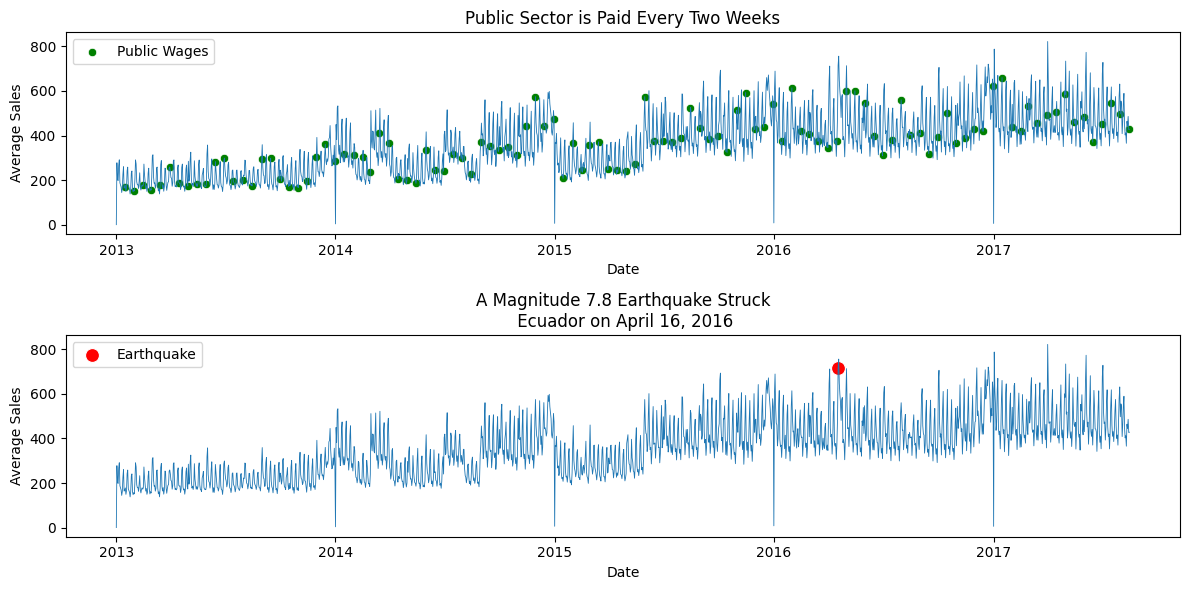

In [ ]:
start_date = '2013-01-01'
end_date = '2017-08-15'

train_df_groupby = train_df.groupby('date')['sales'].mean().reset_index()
public_wages = train_df_groupby.loc[(train_df_groupby['date'].dt.day == 15) |\
                                    (train_df_groupby['date'].isin(pd.date_range(start=start_date,
                                                                                 end=end_date, freq='M')))]

# Create a grid of subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Draw the first line plot for Oil Price on the first subplot
sns.lineplot(data=train_df.groupby('date')['sales'].mean().reset_index(), x='date', y='sales', lw=0.6, ax=axes[0])
sns.scatterplot(data=public_wages, x='date', y='sales', ax=axes[0], color='green', label='Public Wages')

# Add labels and title for the first subplot
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Average Sales")
axes[0].set_title("Public Sector is Paid Every Two Weeks")

# Draw the second line plot for Average Sales on the second subplot
sns.lineplot(data=train_df.groupby('date')['sales'].mean().reset_index(), x='date', y='sales', lw=0.6, ax=axes[1])
sns.scatterplot(data=train_df.groupby('date')['sales'].mean().to_frame().query("date == '2016-04-17'").reset_index(),
                x='date', y='sales', color='red', label='Earthquake', s=100, ax=axes[1])
#plt.axvline(x=pd.to_datetime('2016-04-16'), color='red', linestyle='-', label='test', alpha=0.3)

# Add labels and title for the second subplot
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Average Sales")
axes[1].set_title("A Magnitude 7.8 Earthquake Struck\n Ecuador on April 16, 2016")

# Adjust the layout to avoid overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()

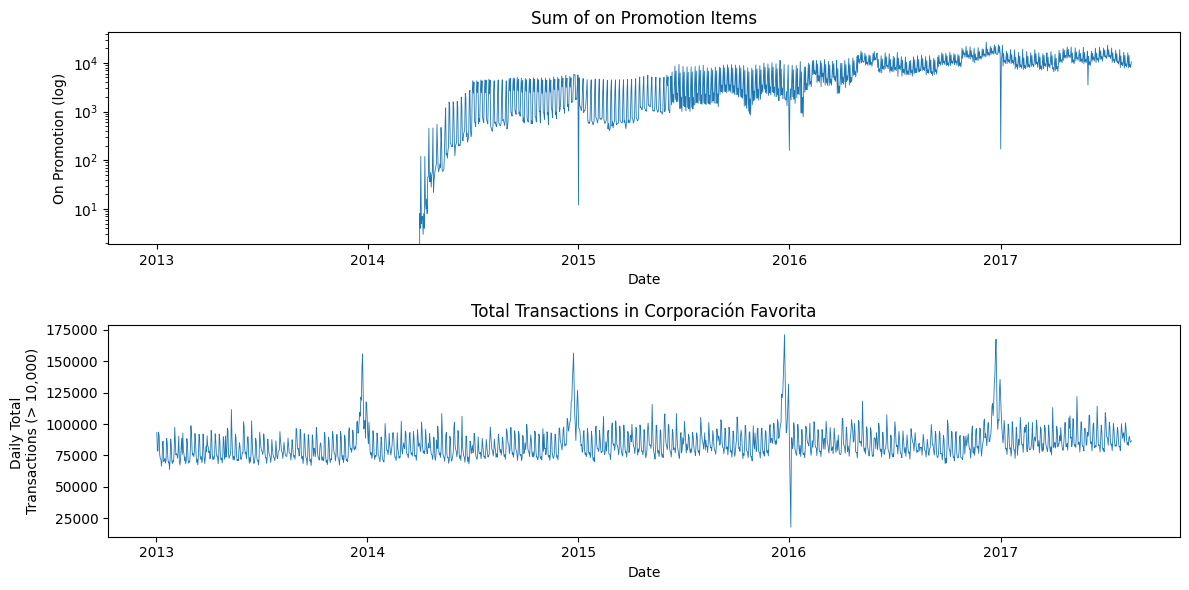

In [ ]:
merge_df2 = pd.merge(left=train_df.groupby('date')['onpromotion'].sum().reset_index(),
                     right=transactions_df.groupby('date')['transactions'].sum().reset_index(),
                     how='left',
                     on='date').fillna('0')

merge_df2['transactions'] = merge_df2['transactions'].astype('int')

# Create a grid of subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Draw the first line plot for Oil Price on the first subplot
sns.lineplot(x=merge_df2.date, y=merge_df2.onpromotion, lw=0.6, ax=axes[0])

# Add labels and title for the first subplot
axes[0].set_xlabel("Date")
axes[0].set_yscale('log')
axes[0].set_ylabel("On Promotion (log)")
axes[0].set_title("Sum of on Promotion Items")

# Draw the second line plot for Average Sales on the second subplot
sns.lineplot(data=merge_df2.query('transactions > 10000'), x='date', y='transactions', lw=0.6, ax=axes[1])

# Add labels and title for the second subplot
axes[1].set_xlabel("Date")
#axes[1].set_yscale('log')
axes[1].set_ylabel("Daily Total \nTransactions (> 10,000)")
axes[1].set_title("Total Transactions in Corporación Favorita")

# Adjust the layout to avoid overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()

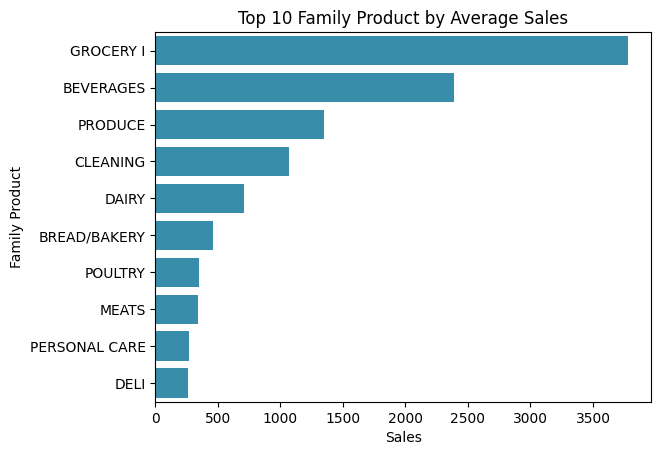

In [ ]:
# the top 10 product family by sales

sns.barplot(data=train_df.groupby('family')['sales'].mean().sort_values(ascending=False)[:10].reset_index(),
            x='sales', y='family', color='#2596be')

plt.title('Top 10 Family Product by Average Sales')
plt.ylabel('Family Product')
plt.xlabel('Sales')
plt.show()

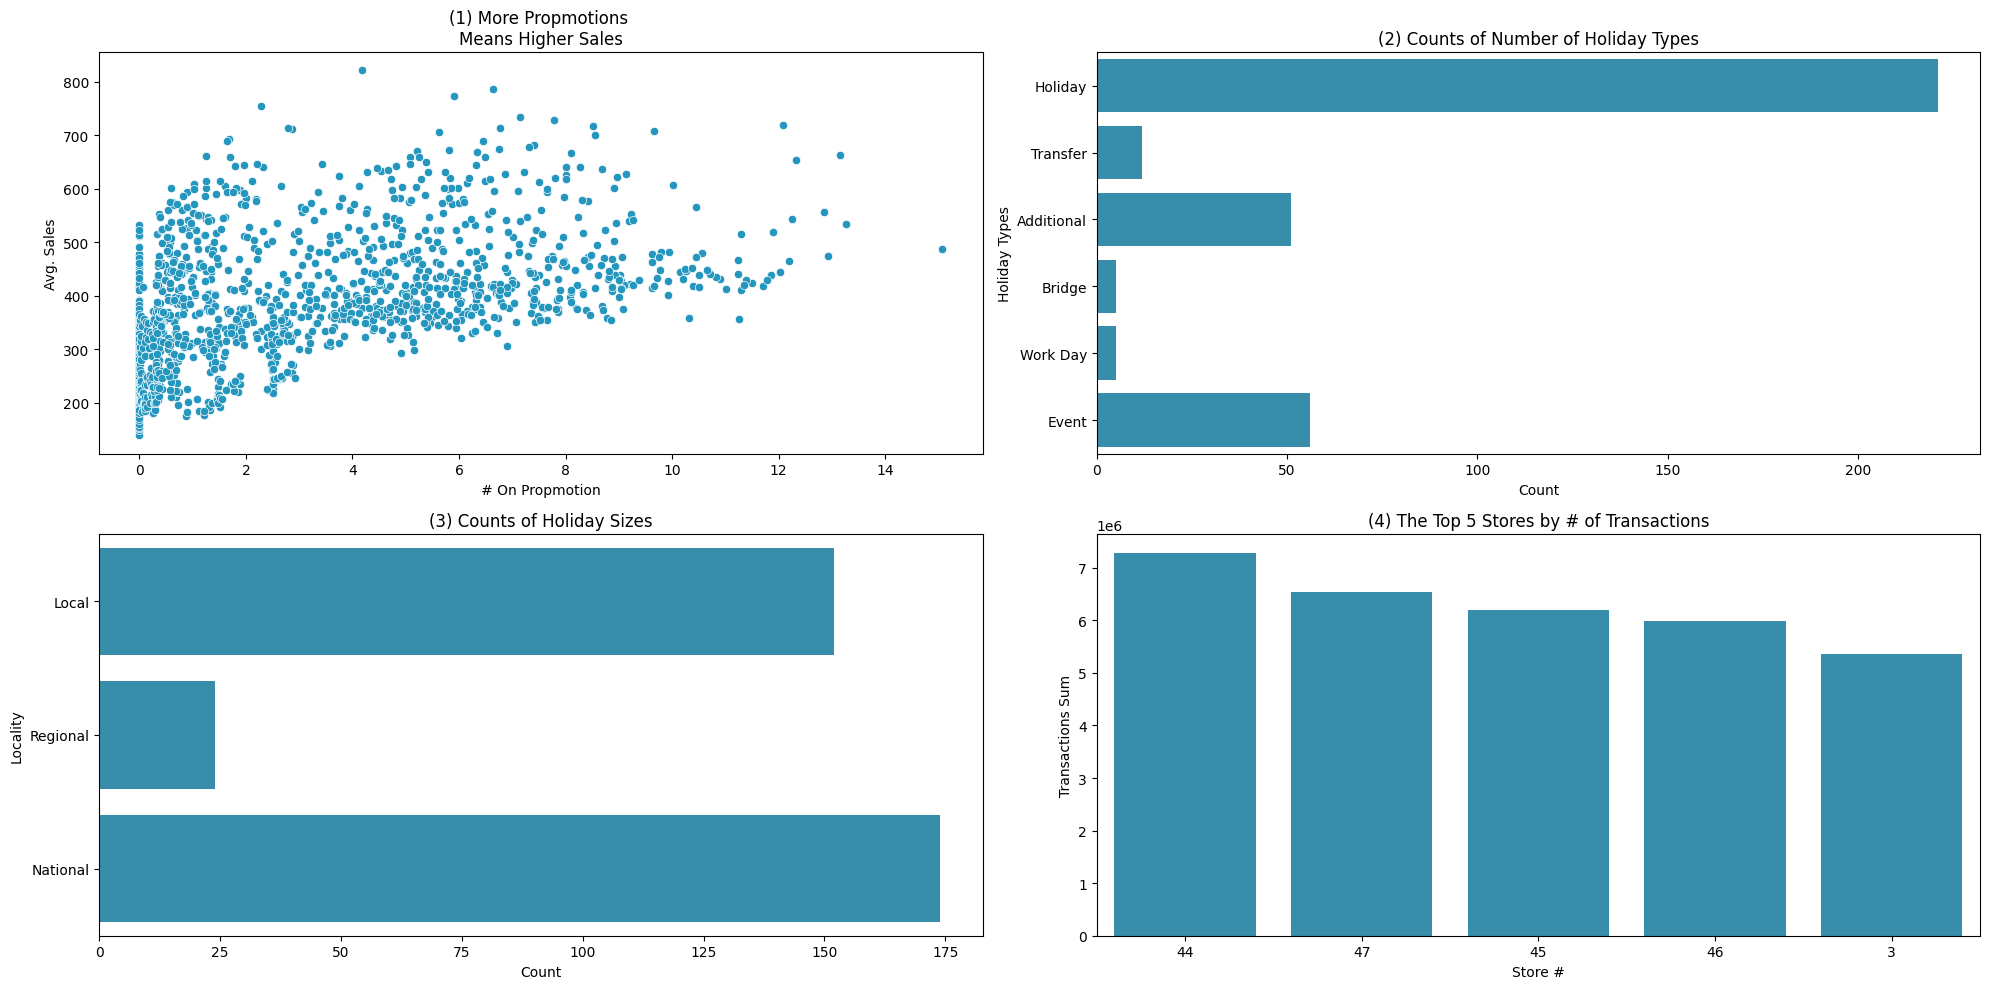

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
#Display a scatter plot in the first subplot that shows the relationship between the 'onpromotion' and 'sales' columns from the 'train_df' DataFrame
# . It focuses on instances where sales are greater than 100. The x-axis represents the 'onpromotion' status, and the y-axis represents average sales.
sns.scatterplot(data=train_df.groupby('date')[['sales', 'onpromotion']].mean().query('sales > 100'),
                x='onpromotion', y='sales', ax=axes[0, 0], color='#2596be')
axes[0,0].set_title('(1) More Propmotions \nMeans Higher Sales')
axes[0,0].set_xlabel('# On Propmotion')
axes[0,0].set_ylabel('Avg. Sales')

#Show a count plot in the second subplot that displays the distribution of different holiday types using the 'type' column from the 'holidays_events_df' DataFrame.
sns.countplot(data=holidays_events_df, y='type', ax=axes[0, 1], color='#2596be')
axes[0,1].set_title('(2) Counts of Number of Holiday Types')
axes[0,1].set_xlabel('Count')
axes[0,1].set_ylabel('Holiday Types')

#Display another count plot in the third subplot that shows the distribution of holiday sizes using the 'locale' column from the 'holidays_events_df' DataFrame.
sns.countplot(data=holidays_events_df, y='locale', ax=axes[1, 0], color='#2596be')
axes[1,0].set_title('(3) Counts of Holiday Sizes')
axes[1,0].set_xlabel('Count')
axes[1,0].set_ylabel('Locality')

#Create a bar plot in the fourth subplot, showing the top 5 stores with the highest total transactions from the 'transactions_df' DataFrame.
# It focuses on stores with store numbers [44, 47, 45, 46, 3].
sns.barplot(data=transactions_df.groupby('store_nbr')['transactions'].sum() \
            .sort_values(ascending=False).to_frame()[:5].reset_index(),
            y='transactions', x='store_nbr', order=[44, 47, 45, 46, 3], ax=axes[1, 1], color='#2596be')
axes[1,1].set_title('(4) The Top 5 Stores by # of Transactions')
axes[1,1].set_xlabel('Store #')
axes[1,1].set_ylabel('Transactions Sum')

plt.tight_layout()  # Adjust the spacing between subplots

plt.show()

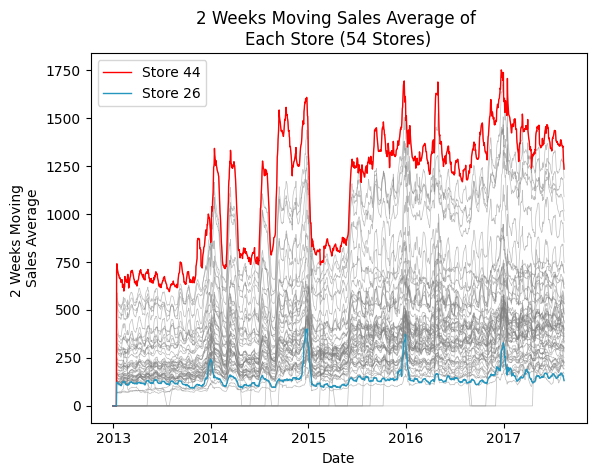

In [ ]:
#Create a pivot table named 'store_pivot' from the 'train_df' DataFrame, calculating the mean sales for each store on different dates. 
# Apply a rolling 2-week window average to smooth out fluctuations and fill missing values with zeros.
store_pivot = train_df.pivot_table(values='sales', index='date',
                       columns='store_nbr', aggfunc=np.mean).rolling(window=14).mean().fillna(0)
#Plot gray lines for each store's 2-week moving average using a loop.
for i in range(54):
    sns.lineplot(data=store_pivot.iloc[:,i].reset_index(), x='date', y=i+1, lw=0.5, color='gray', alpha=0.5)
    
#Plot the 2-week moving averages for two specific stores, Store 44 and Store 26, using red and blue colors, respectively.
sns.lineplot(data=store_pivot.iloc[:,43].reset_index(), x='date', y=44,
             lw=1, color='red', alpha=1, label='Store 44')
sns.lineplot(data=store_pivot.iloc[:,25].reset_index(), x='date', y=26,
             lw=1, color='#2596be', alpha=1, label='Store 26')

# add labels and title
plt.xlabel("Date")
plt.ylabel("2 Weeks Moving \nSales Average")
plt.title("2 Weeks Moving Sales Average of \nEach Store (54 Stores)")
plt.show()

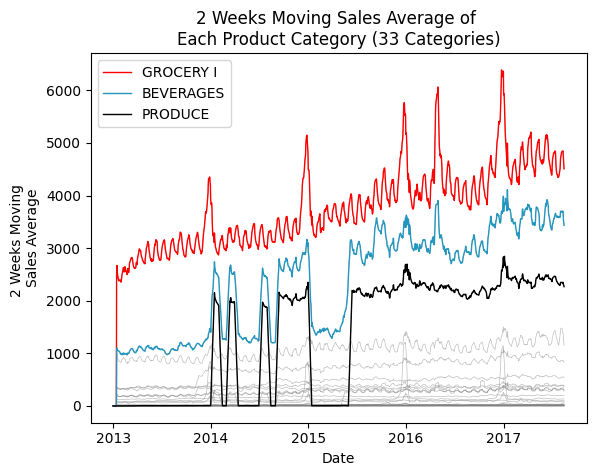

In [ ]:
#Create a pivot table named 'product_pivot' from the 'train_df' DataFrame, calculating the mean sales for each product category on different dates. 
# Apply a rolling 2-week window average to smooth out fluctuations and fill missing values with zeros.
product_pivot = train_df.pivot_table(values='sales', index='date',
                       columns='family', aggfunc=np.mean).rolling(window=14).mean().fillna(0)

#Plot gray lines for each product category's 2-week moving average using a loop.
for idx, i in enumerate(product_pivot.columns):
    sns.lineplot(data=product_pivot.iloc[:,idx].reset_index(), x='date', y=product_pivot.columns[idx],
                 lw=0.5, color='gray', alpha=0.5)
#Plot the 2-week moving averages for three specific product categories, 'GROCERY I', 'BEVERAGES', and 'PRODUCE', using different colors.
sns.lineplot(data=product_pivot.loc[:,'GROCERY I'].reset_index(), x='date', y='GROCERY I',
             lw=1, color='red', alpha=1, label='GROCERY I')
sns.lineplot(data=product_pivot.loc[:,'BEVERAGES'].reset_index(), x='date', y='BEVERAGES',
             lw=1, color='#2596be', alpha=1, label='BEVERAGES')
sns.lineplot(data=product_pivot.loc[:,'PRODUCE'].reset_index(), x='date', y='PRODUCE',
             lw=1, color='black', alpha=1, label='PRODUCE')

# add labels and title
plt.xlabel("Date")
plt.ylabel("2 Weeks Moving \nSales Average")
plt.title("2 Weeks Moving Sales Average of \nEach Product Category (33 Categories)")
plt.show()

In [ ]:
train_master.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_store,cluster,transactions,type_holiday,locale,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,0,Holiday,National,False
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,0,Holiday,National,False
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,0,Holiday,National,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,0,Holiday,National,False
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,0,Holiday,National,False


In [ ]:
train_master.dtypes

id                       int64
date            datetime64[ns]
store_nbr                int64
family                  object
sales                  float64
onpromotion              int64
dcoilwtico             float64
city                    object
state                   object
type_store              object
cluster                  int64
transactions            object
type_holiday            object
locale                  object
transferred             object
dtype: object

In [ ]:
test_master.head()

,id,date,store_nbr,family,onpromotion,dcoilwtico,city,state,type_store,cluster,transactions,type_holiday,locale,transferred
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,Quito,Pichincha,D,13,0,Not Any,Not Any,False
1,3000889,2017-08-16,1,BABY CARE,0,46.8,Quito,Pichincha,D,13,0,Not Any,Not Any,False
2,3000890,2017-08-16,1,BEAUTY,2,46.8,Quito,Pichincha,D,13,0,Not Any,Not Any,False
3,3000891,2017-08-16,1,BEVERAGES,20,46.8,Quito,Pichincha,D,13,0,Not Any,Not Any,False
4,3000892,2017-08-16,1,BOOKS,0,46.8,Quito,Pichincha,D,13,0,Not Any,Not Any,False


In [ ]:
#Remove columns 'id', 'date', 'transferred', and 'type_holiday' from the 'train_master' 
train_master=train_master.drop(['id','date','transferred','type_holiday'],axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Create a list called 'cats' containing specific column names from the 'train_master' DataFrame. Extract the data from these columns. 
# Then, use the OneHotEncoder to convert categorical data into one-hot encoded format. The resulting 'one_hot_encoded_data' holds the transformed data.
#The 'categories' list contains arrays of unique values for each categorical column in the original data, which can be useful for reference or analysis.

cats = ['store_nbr','family','city','state','type_store','locale','cluster']
cats_data=train_master[cats]
encoder = OneHotEncoder()
one_hot_encoded_data = encoder.fit_transform(cats_data)

categories = [encoder.categories_[i] for i in range(len(encoder.categories_))]

In [ ]:
#Generate a list of column names by combining categorical column names and their unique values from the 'categories' list. 
# This creates a set of new column names to represent the one-hot encoded categorical data.
column_names = []
for i in range(len(categories)):
    for j in range(len(categories[i])):
        column_names.append(f'{cats[i]}_{categories[i][j]}')

In [ ]:
#Create a Pandas DataFrame 'one_hot_encoded_data' from the one-hot encoded array with generated column names. 
# Then reset the indexes of both the 'train_master' and 'one_hot_encoded_data' DataFrames. 
# Finally, merge them horizontally into 'final_data_encoded' DataFrame to combine original and encoded data.
one_hot_encoded_data = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)
train_master = train_master.reset_index(drop=True)
one_hot_encoded_data = one_hot_encoded_data.reset_index(drop=True)
final_data_encoded = pd.concat([train_master, one_hot_encoded_data], axis=1)


In [ ]:
final_data_encoded.head()

,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_store,cluster,transactions,...,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
0,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
final_data_encoded.drop(cats, axis=1, inplace=True)
final_data_encoded.head()

,sales,onpromotion,dcoilwtico,transactions,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,...,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
0,0.0,0,93.14,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0,93.14,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0,93.14,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0,93.14,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0,93.14,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
data = final_data_encoded.copy()
data.head()

,sales,onpromotion,dcoilwtico,transactions,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,...,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
0,0.0,0,93.14,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0,93.14,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0,93.14,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0,93.14,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0,93.14,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X = data
y = train_master.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train)

2902383      13.000
1651514     325.525
1948349       4.000
2893871       5.000
2867501       4.000
             ...   
1692743     181.000
2356330       0.000
2229084       8.000
2768307    1594.000
2219110     123.000
Name: sales, Length: 2400710, dtype: float64


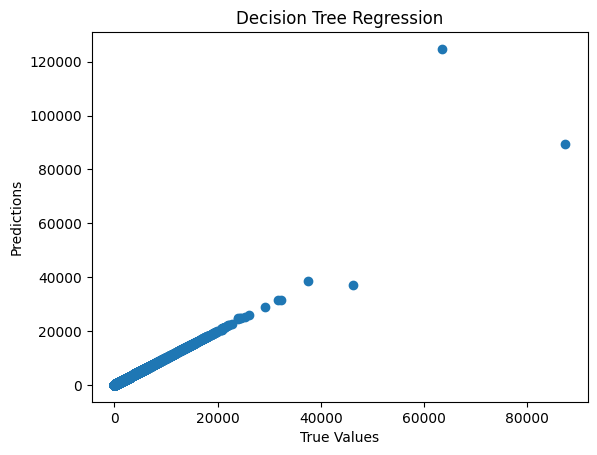


Evaluation Results for Decision Tree Regression:
MSE: 6410.38
RMSE: 80.06
r2_score: 0.9948420353684659


In [ ]:

dt = DecisionTreeRegressor()
#Fit the model using training data.
dt.fit(X_train, y_train)

#Predict sales on the testing data and visualize predictions against true values using a scatter plot.
dt_predictions = dt.predict(X_test)
plt.scatter(y_test, dt_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Decision Tree Regression")
plt.show()

#Calculate mean squared error (MSE), root mean squared error (RMSE), absolute predictions, and R-squared (r2_score) as evaluation metrics.
dt_mse = mean_squared_error(y_test, dt_predictions).round(2)
dt_rmse = np.sqrt(dt_mse).round(2)
dt_predictions_abs = abs(dt_predictions)
r2=r2_score(y_test,dt_predictions)

print("\nEvaluation Results for Decision Tree Regression:")
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("r2_score:",r2)

